In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
def hypothesis_ttest_mu(sample_data, mu, alpha,alternative='two-sided'):
  """
  Performs a hypothesis test for the population mean assuming a normal distribution.

  Args:
    sample_data: A list or numpy array of sample data.
    mu: The hypothesized population mean.
    alpha: The significance level (default is 0.05).

  Returns:
    A dictionary containing the test statistic, p-value, and conclusion.
  """

  # Calculate the sample mean and standard deviation
  sample_mean = np.mean(sample_data)
  sample_std = np.std(sample_data,ddof=1) #ddof=1 because we want to divide by n-1.
  sample_size = len(sample_data)

  # Calculate the t-statistic
  t_statistic = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))

  # Calculate the p-value (two-tailed test)
  if alternative == 'two-sided':
    p_value = (1-stats.t.cdf(np.abs(t_statistic), df=sample_size - 1)) * 2
  # Calculate the p-value (one-tailed test)
  elif alternative == 'greater':
    p_value = 1 - stats.t.cdf(t_statistic, df=sample_size - 1)
  elif alternative == 'less':
    p_value = stats.t.cdf(t_statistic, df=sample_size - 1)
  else:
    raise ValueError("alternative must be 'two-sided' or 'greater' or 'less'")

  # Determine the conclusion
  if p_value < alpha:
    conclusion = "Reject the null hypothesis."
  else:
    conclusion = "Fail to reject the null hypothesis."

  return {
      "t_statistic": t_statistic,
      "p_value": p_value,
      "conclusion": conclusion
  }

In [ ]:
null_mean = 5
null_std = 1
error = 0.1
sample_size = 100
# Generate sample
sample = np.random.normal(null_mean*(1-error),null_std,sample_size)  # Example sample

# Save to a text file
np.savetxt("sample_data.txt", sample, fmt="%.4f")

In [ ]:
result = hypothesis_ttest_mu(sample,null_mean,0.05,alternative='two-sided')
print("Test Results:")
print(f"t-statistic: {result['t_statistic']:.5f}")
print(f"p-value: {result['p_value']:.5f}")
print(f"Conclusion: {result['conclusion']}")

Test Results:
t-statistic: -6.75035
p-value: 0.00000
Conclusion: Reject the null hypothesis.


In [ ]:
t_stat, p_val = stats.ttest_1samp(sample,null_mean,alternative='two-sided')

print(f"sample mean = {np.mean(sample):.2f}, t-stitistic = {t_stat:.5f}, p-value = {p_val:.5f}")

sample mean = 4.32, t-stitistic = -6.75035, p-value = 0.00000


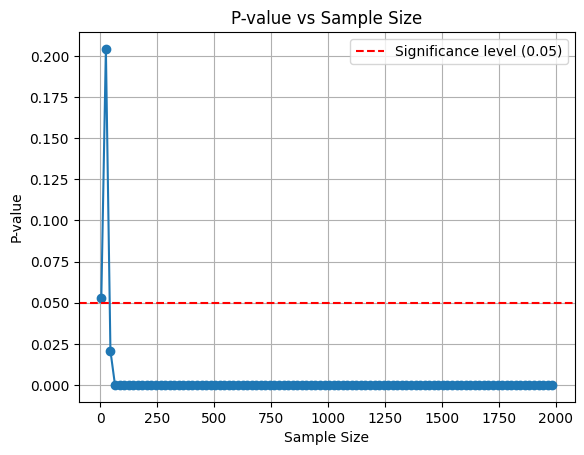

In [ ]:
# Test how p-value changes with sample size when H0 is wrong.
sample_sizes = np.arange(5, 2001, 20)

p_values = []

for n in sample_sizes:
    sample = np.random.normal(null_mean*(1+error),null_std,n)
    t_stat, p_val = stats.ttest_1samp(sample,null_mean,alternative='two-sided')
    p_values.append(p_val)

    #print(f"n = {n}, sample mean = {np.mean(sample):.2f}, p-value = {p_val:.4f}")

# Plot p-value vs sample size
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level (0.05)')
plt.title('P-value vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('P-value')
plt.legend()
plt.grid(True)
plt.show()